In [1]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns 

# 1 Import feature counts Data 

In [2]:
# Import DEG data from Rstudio output (DESeq2 analysis) 
counts = pd.read_csv('9_create_GeneCountsMatrix/gene_matrix_count.csv')

In [3]:
# reset indx and transform 
counts = counts.set_index('Geneid').T

# use standard Scaler from sklearn preprocessing to scale the data
scaler = preprocessing.StandardScaler()
X_scaled  = scaler.fit_transform(counts)

# decomposition from many components to only 2 (to be able to plot it) 
pca = PCA(n_components=2)
counts_transfomred = pca.fit_transform(X_scaled)
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.42077571 0.13440361]


In [4]:
# convert the sample names to uniform condition names for plot legend 
def transform_index_to_number(sample:str)->int:
    """Transform the index of the counts dataframe to a number"""
    if sample.startswith('N'):
        return 'Normoxia'
    elif sample.startswith('A'):
        return 'Anoxia'
    elif sample.startswith('R'):
        return 'Reoxygenation'

colors = counts.index.map(transform_index_to_number)

In [5]:
colors

Index(['Reoxygenation', 'Normoxia', 'Anoxia', 'Anoxia', 'Reoxygenation',
       'Reoxygenation', 'Normoxia', 'Anoxia', 'Reoxygenation', 'Anoxia',
       'Normoxia', 'Normoxia'],
      dtype='object')

# 2 PCA plot

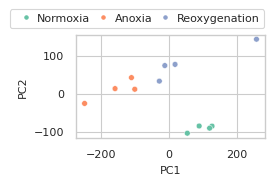

In [8]:
# PLOT 
sns.set_theme(palette = 'Set2', style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
plt.figure(figsize=((7/2.54), (5/2.54)))
g = sns.scatterplot(x=counts_transfomred[:,0], y=counts_transfomred[:,1], hue=colors, hue_order=['Normoxia', 'Anoxia', 'Reoxygenation'], s=17)
sns.move_legend(g,  markerscale=0.5, loc='lower right', ncol=3, bbox_to_anchor=(1, 1.05), frameon=True, columnspacing=0.2, scatteryoffsets=[0.6], handletextpad=0.01, borderaxespad=0.1)

#g.add_legend(title='', fontsize=8, loc='upper center', borderaxespad=0.1, ncol=2, bbox_to_anchor=(.33, 0.02), frameon=True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# export 
plt.savefig('13_pca_plot_for_sample/PCA_sample_clustering_in_RNAseqData_plot.svg')